**Step 1:** Import Libraries and Dataset
First, let's import the necessary libraries and load the dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Load the Iris dataset from Scikit-learn
iris = load_iris()




 Convert Data to DataFrame
The dataset loaded from Scikit-learn is in a dictionary-like format. Let’s convert it into a Pandas DataFrame for easier manipulation.

In [ ]:
# Convert the data into a pandas DataFrame for easier manipulation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target labels (species) to the DataFrame
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first 5 rows of the DataFrame
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Descriptive Statistics
To better understand the data, let's check some basic statistics about the dataset.

In [ ]:
# Descriptive statistics of the dataset
print(iris_df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Visualizing the Data
Let’s now visualize the data to better understand the relationships between the features. We’ll use a scatter plot to plot sepal width against sepal length:




In [ ]:
# Visualizing the relationship between sepal_width and sepal_length with a scatter plot
fig = px.scatter(iris_df, x="sepal width (cm)", y="sepal length (cm)", color="species")
fig.show()


Pair Plot (Scatterplot Matrix)
A pair plot is a great way to visualize the relationships between all pairs of features in a dataset. It will show scatter plots of each feature against the others.

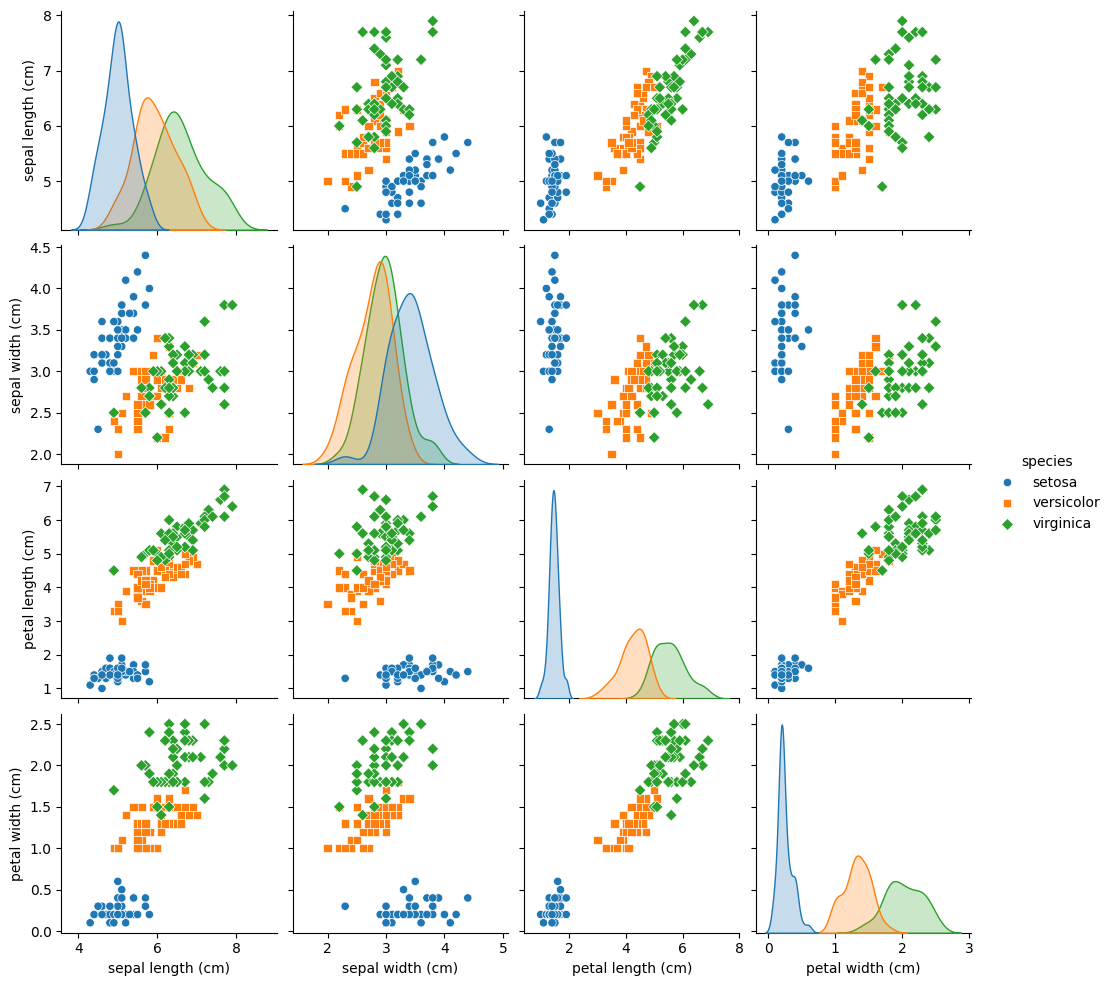

In [ ]:
# Pair plot to visualize the relationships between features
import seaborn as sns # Import the seaborn library and alias it as sns
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

Histograms for Each Feature
We can also visualize the distribution of each feature (sepal length, sepal width, petal length, and petal width) by using histograms.

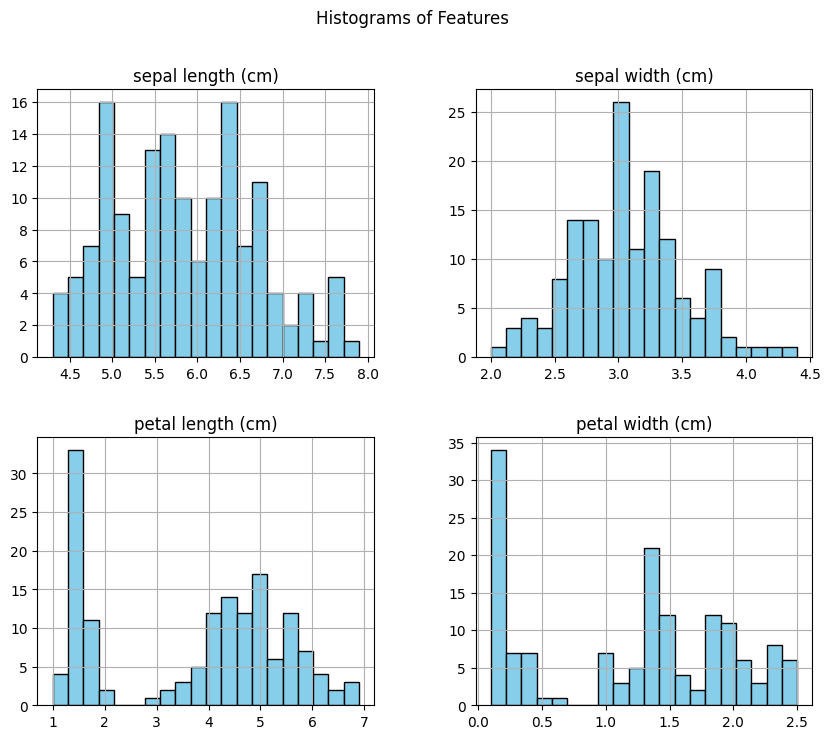

In [ ]:
# Plot histograms for each feature
iris_df.drop('species', axis=1).hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()


 Boxplots for Each Feature
Boxplots are useful for visualizing the distribution of data, showing the median, quartiles, and potential outliers.

<ipython-input-24-97fe97111278>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-97fe97111278>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-97fe97111278>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-97fe97111278>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




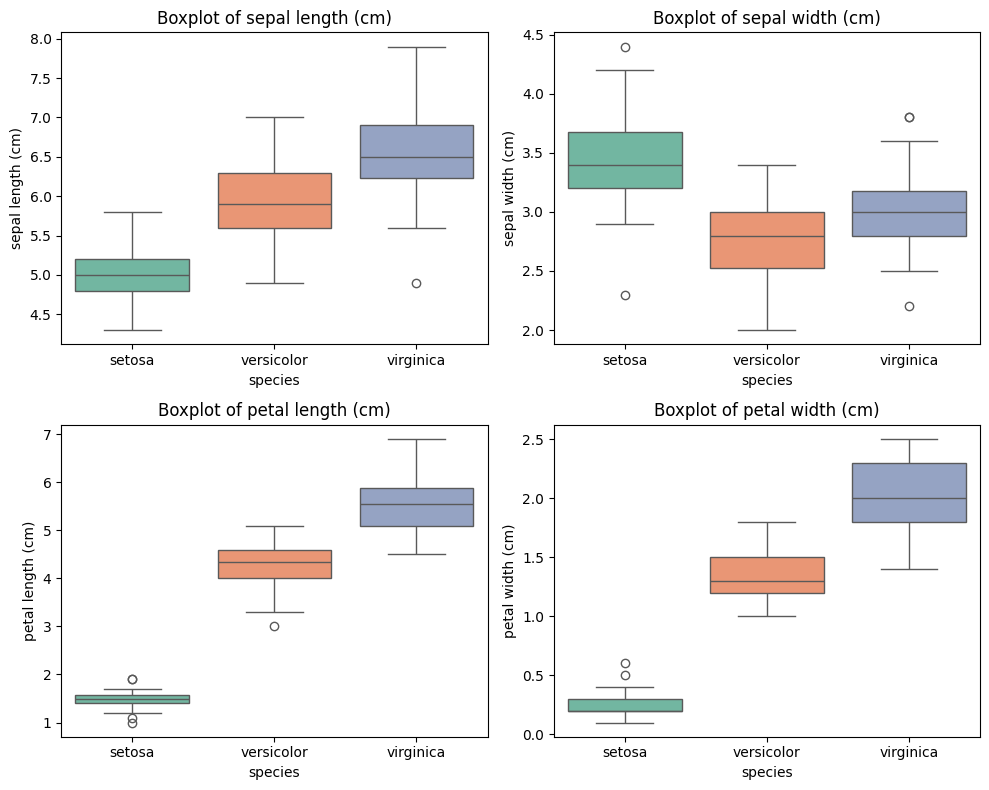

In [ ]:
# Create boxplots for each feature
plt.figure(figsize=(10, 8))
for i, column in enumerate(iris_df.drop('species', axis=1).columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=column, data=iris_df, palette='Set2')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


repare Data for Training
We will now prepare the features (X) and target labels (y) for training the model.

In [ ]:
# Features (sepal length, sepal width, petal length, petal width)
X = iris.data

# Target labels (species)
y = iris.target


Split the Data into Training and Test Sets
Next, we’ll split the dataset into training and testing sets using an 80/20 split:



In [ ]:
# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


 Train the K-Nearest Neighbors (KNN) Model
Let’s now train the K-Nearest Neighbors (KNN) classifier. We’ll set n_neighbors=1, meaning the model will classify a new flower based on the closest neighbor in the training set.

In [ ]:
# Initialize and train the KNN classifier with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Make Predictions
Let’s input a new set of measurements for an iris flower and predict its species.

In [ ]:
# Input a new set of flower measurements (sepal length, sepal width, petal length, petal width)
x_new = np.array([[5, 2.9, 1, 0.2]])

# Use the trained model to predict the species
prediction = knn.predict(x_new)

# Output the predicted species
print("Prediction: {}".format(iris.target_names[prediction][0]))


Prediction: setosa


Evaluate the Model
Finally, let’s check the accuracy of the model using the test set.

In [ ]:
# Evaluate the model's accuracy on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%
